# **Load the datasets**

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
url = "https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset/data"
od.download(url)

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset


100%|██████████| 2.04G/2.04G [00:16<00:00, 134MB/s]


**Human society needs to increase food production by an estimated 70% by 2050 to feed an expected population size that is predicted to be over 9 billion people. Currently, infectious diseases reduce the potential yield by an average of 40% with many farmers in the developing world experiencing yield losses as high as 100%. The widespread distribution of smartphones among crop growers around the world with an expected 5 billion smartphones by 2020 offers the potential of turning the smartphone into a valuable tool for diverse communities growing food. One potential application is the development of mobile disease diagnostics through machine learning and crowdsourcing. Here we announce the release of over 50,000 expertly curated images on healthy and infected leaves of crops plants through the existing online platform PlantVillage. We describe both the data and the platform. These data are the beginning of an on-going, crowdsourcing effort to enable computer vision approaches to help solve the problem of yield losses in crop plants due to infectious diseases.**

**Plant Disease Prediction with a Custom CNN¶**

This notebook demonstrates an end-to-end project for classifying plant diseases from leaf images.

- Objective: To build a deep learning model that can accurately identify 38 different types of plant diseases.

- Dataset: The public PlantVillage dataset.

- Approach: A custom Convolutional Neural Network (CNN) is built from scratch using TensorFlow/Keras. Data augmentation techniques are applied to improve model robustness.

- Workflow: The process includes data loading, preprocessing, model training, evaluation.

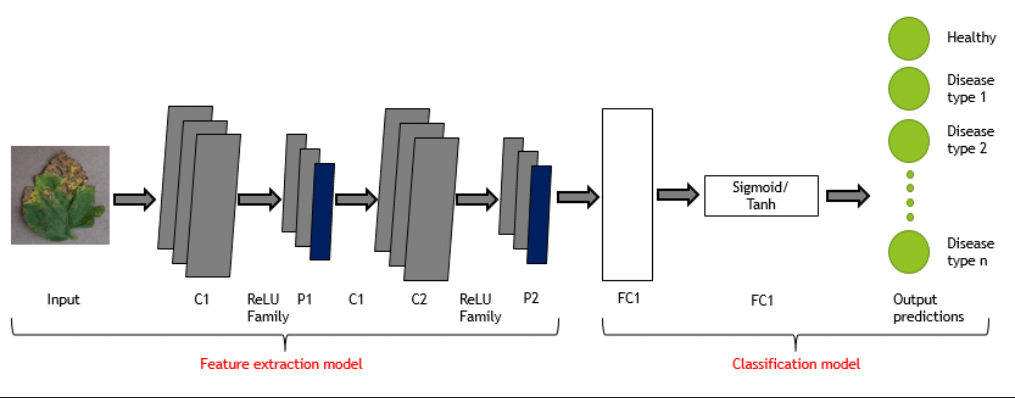

**Import Core library**

In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers , models
from tensorflow.keras.layers import Dropout  , Dense, Flatten , BatchNormalization , MaxPool2D , Conv2D , MaxPooling2D
from keras.models import Sequential
from sklearn.metrics import accuracy_score , confusion_matrix

In [4]:
print(os.listdir("/content/plantvillage-dataset/plantvillage dataset"))

print("Segmented - " , len(os.listdir("/content/plantvillage-dataset/plantvillage dataset/segmented")))
print(os.listdir("/content/plantvillage-dataset/plantvillage dataset/segmented")[:5])

print("Color - " , len(os.listdir("/content/plantvillage-dataset/plantvillage dataset/color")))
print(os.listdir("/content/plantvillage-dataset/plantvillage dataset/color")[:5])

print("GrayScale - " , len(os.listdir("/content/plantvillage-dataset/plantvillage dataset/grayscale")))
print(os.listdir("/content/plantvillage-dataset/plantvillage dataset/grayscale")[:5])

['grayscale', 'color', 'segmented']
Segmented -  38
['Grape___healthy', 'Pepper,_bell___healthy', 'Tomato___Leaf_Mold', 'Raspberry___healthy', 'Tomato___healthy']
Color -  38
['Grape___healthy', 'Pepper,_bell___healthy', 'Tomato___Leaf_Mold', 'Raspberry___healthy', 'Tomato___healthy']
GrayScale -  38
['Grape___healthy', 'Pepper,_bell___healthy', 'Tomato___Leaf_Mold', 'Raspberry___healthy', 'Tomato___healthy']


**There are total 38 categories of leaf class**

In [5]:

print(len(os.listdir("/content/plantvillage-dataset/plantvillage dataset/color/Apple___Apple_scab")))
print(os.listdir("/content/plantvillage-dataset/plantvillage dataset/color/Apple___Apple_scab")[:5])

630
['6b66d8dd-af9f-43b5-a43f-6e4c6d64bede___FREC_Scab 3248.JPG', 'ced72cdb-0358-420c-abdd-1c94ba303435___FREC_Scab 3217.JPG', '0db71c1d-93d7-4481-b0d0-b73f995131a9___FREC_Scab 2976.JPG', 'c665dad4-adfc-40a3-b1cc-a29aed48d93c___FREC_Scab 3246.JPG', 'f0d56524-1296-4a54-bafa-9b620baf9f1d___FREC_Scab 2942.JPG']


# **Data Preprocessing**

In [6]:
base_sir = "/content/plantvillage-dataset/plantvillage dataset/color"

**Let's see any random color leaf image**

Each leaf size is - 256(width) x 256(height) x 3(Total 3 channel)

 Image size - (256, 256, 3)


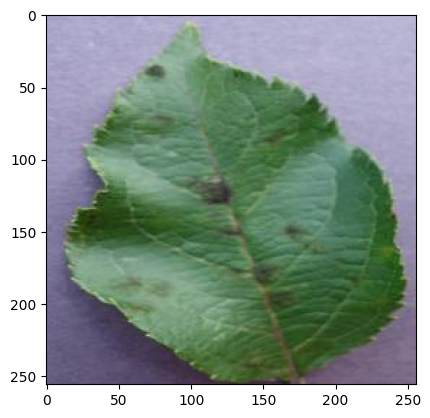

In [7]:
image_path = "/content/plantvillage-dataset/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"
img = plt.imread(image_path)
print(f" Image size - {img.shape}")
# Display the image
plt.imshow(img)
plt.show()

In [8]:
image_path = "/content/plantvillage-dataset/plantvillage dataset/color/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG"
img = plt.imread(image_path)
print(img)

[[[135 128 179]
  [130 123 174]
  [126 119 170]
  ...
  [121 116 172]
  [121 116 172]
  [122 117 173]]

 [[131 124 175]
  [130 123 174]
  [130 123 174]
  ...
  [121 116 172]
  [121 116 172]
  [122 117 173]]

 [[128 121 172]
  [131 124 175]
  [134 127 178]
  ...
  [121 116 172]
  [122 117 173]
  [123 118 174]]

 ...

 [[ 50  34  60]
  [ 50  34  60]
  [ 49  33  59]
  ...
  [ 87  79 116]
  [ 89  81 118]
  [ 90  82 119]]

 [[ 46  31  54]
  [ 46  31  54]
  [ 46  31  54]
  ...
  [ 87  80 114]
  [ 88  81 115]
  [ 89  82 116]]

 [[ 43  28  51]
  [ 43  28  51]
  [ 42  27  50]
  ...
  [ 87  80 114]
  [ 88  81 115]
  [ 88  81 115]]]


**Sample  of leaf image from Apple__Apple_scab folder**

In [9]:
import os
import matplotlib.pyplot as plt

def show_images(dir):
    plt.figure(figsize=(20 , 20))

    for idx, filename in enumerate(os.listdir(dir)[:10]):
        image_path = os.path.join(dir, filename)

        plt.subplot(5,5, idx + 1)
        img = plt.imread(image_path)
        print(f"Image size - {img.shape}")

        plt.imshow(img)
        plt.axis('off')
        plt.title(filename)

    plt.tight_layout()
    plt.show()

Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)


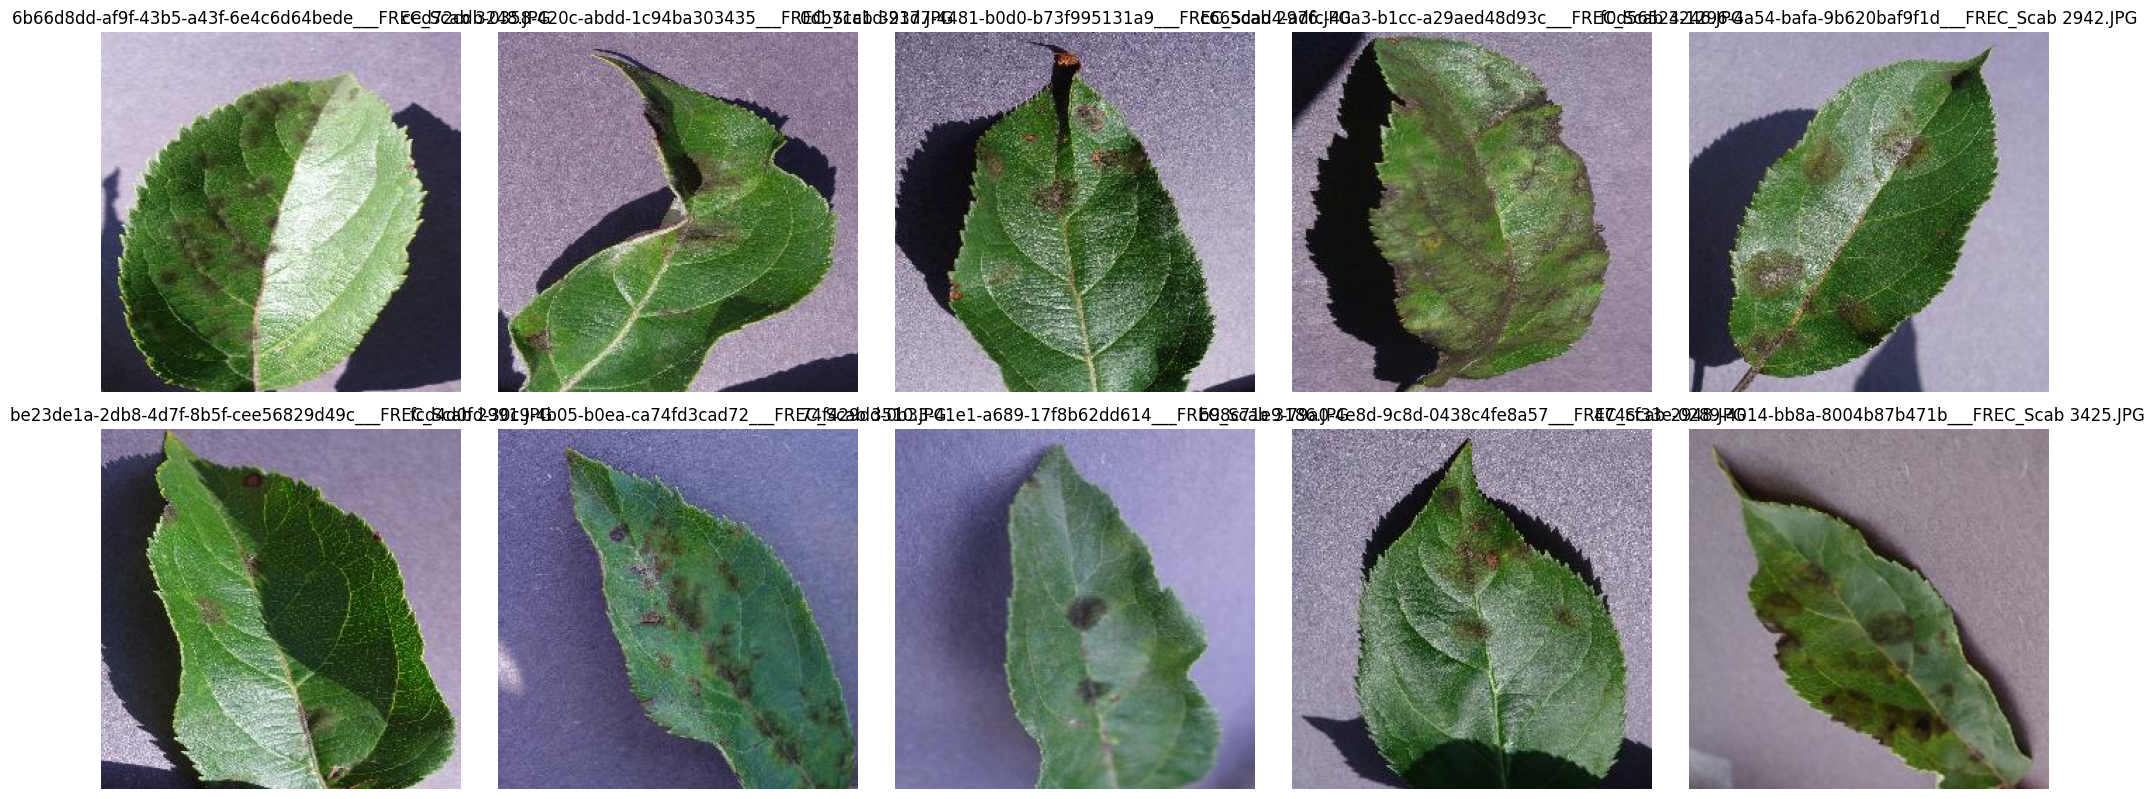

In [10]:
show_images("/content/plantvillage-dataset/plantvillage dataset/color/Apple___Apple_scab")

Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)


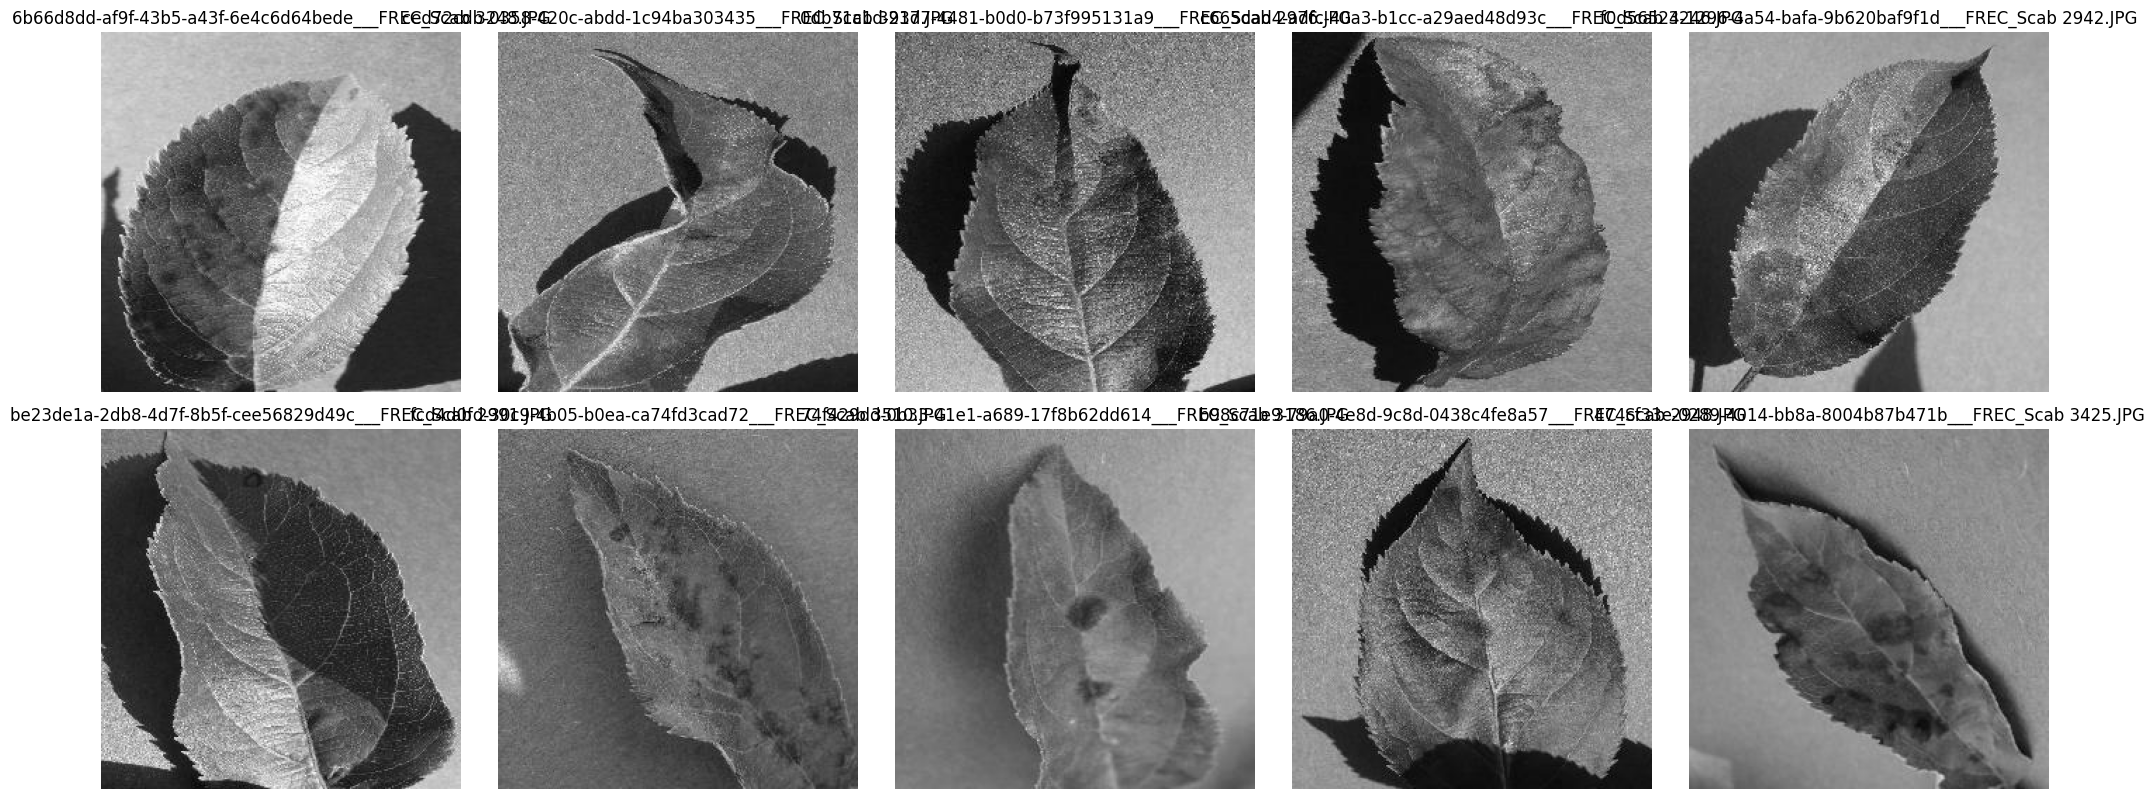

In [11]:
show_images("/content/plantvillage-dataset/plantvillage dataset/grayscale/Apple___Apple_scab")

Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)
Image size - (256, 256, 3)


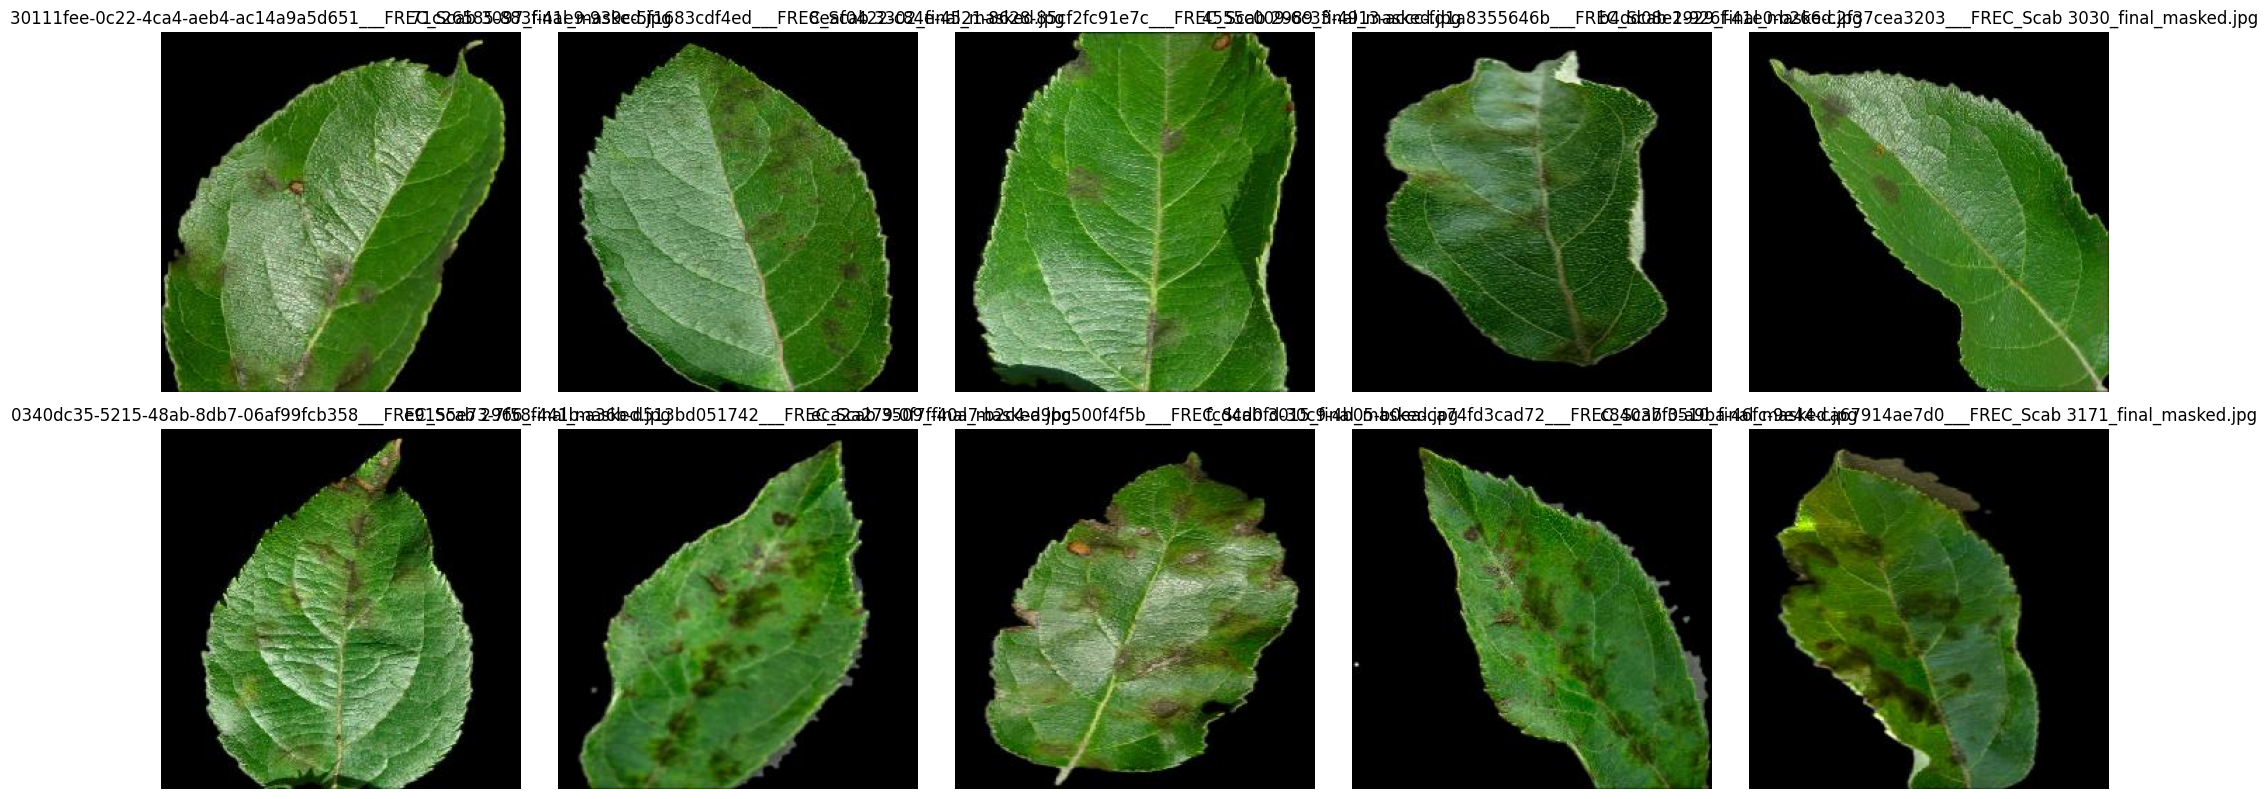

In [12]:
show_images("/content/plantvillage-dataset/plantvillage dataset/segmented/Apple___Apple_scab")

**Now let's see Total Number of image from each folder**

In [13]:
import os

# Path to the parent directory containing class folders
base_dir = "/content/plantvillage-dataset/plantvillage dataset/color"

# List all folders (classes)
data_folders = os.listdir(base_dir)

# Dictionary to hold counts
folder_counts = {}

# Loop through each class folder
for folder in data_folders:
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        image_files = os.listdir(folder_path)
        count = len(image_files)
        folder_counts[folder] = count

# Print image count per folder
for folder, count in folder_counts.items():
    print(f"{folder}: {count} images")


Grape___healthy: 423 images
Pepper,_bell___healthy: 1478 images
Tomato___Leaf_Mold: 952 images
Raspberry___healthy: 371 images
Tomato___healthy: 1591 images
Tomato___Tomato_mosaic_virus: 373 images
Corn_(maize)___Common_rust_: 1192 images
Tomato___Septoria_leaf_spot: 1771 images
Orange___Haunglongbing_(Citrus_greening): 5507 images
Strawberry___healthy: 456 images
Tomato___Early_blight: 1000 images
Blueberry___healthy: 1502 images
Potato___Late_blight: 1000 images
Pepper,_bell___Bacterial_spot: 997 images
Cherry_(including_sour)___Powdery_mildew: 1052 images
Corn_(maize)___Northern_Leaf_Blight: 985 images
Tomato___Target_Spot: 1404 images
Soybean___healthy: 5090 images
Corn_(maize)___healthy: 1162 images
Peach___Bacterial_spot: 2297 images
Apple___Cedar_apple_rust: 275 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 513 images
Grape___Black_rot: 1180 images
Tomato___Bacterial_spot: 2127 images
Apple___Black_rot: 621 images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076 ima

In [14]:
# Converting into Pandas DataFrame
df = pd.DataFrame(list(folder_counts.items()) , columns=["Class" , "image_count"])


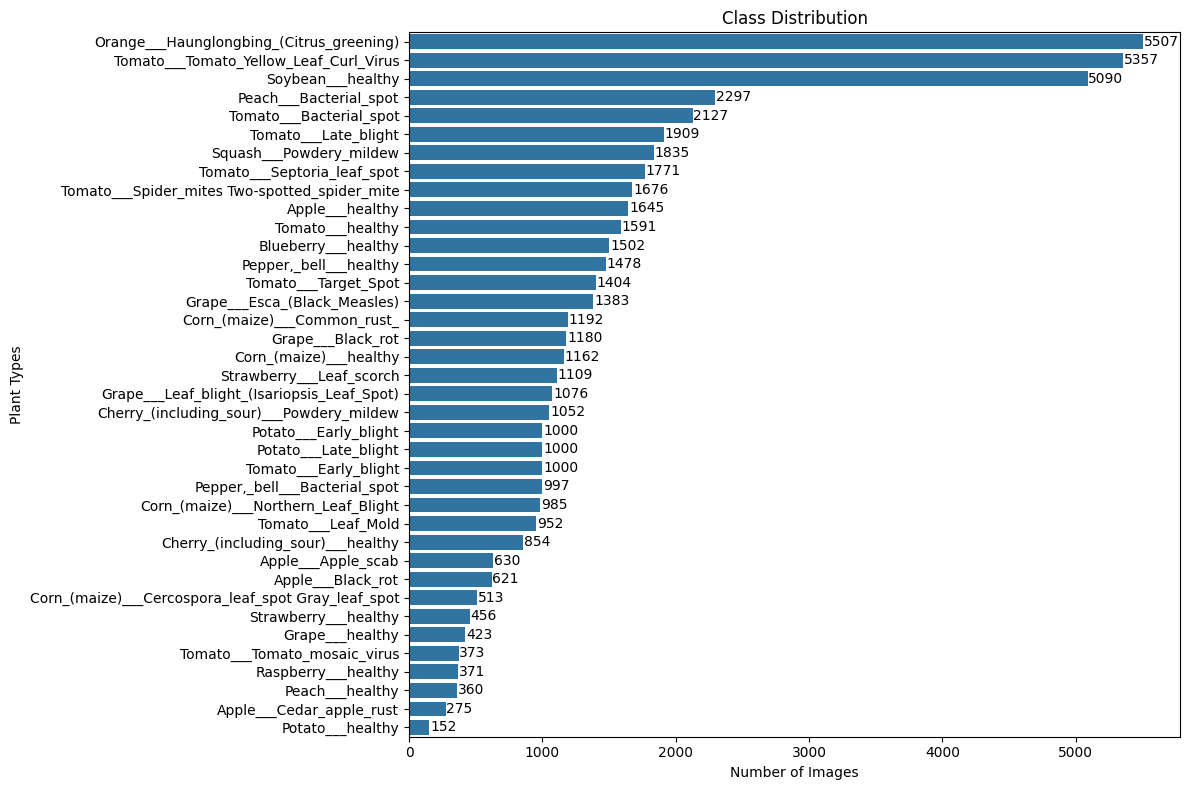

In [39]:
# min_df = df.sample(3)
# plt.figure(figsize = (12 , 5))
# sns.barplot(df , x = "Class" , y = "image_count" , hue  = "Class" , orient='h')
# plt.title("Count of image")

data_dir = '/content/plantvillage-dataset/plantvillage dataset/color'

class_folders = os.listdir(data_dir)
image_paths = []
labels = []

for class_folder in class_folders:
    class_path = os.path.join(data_dir, class_folder)
    image_files = os.listdir(class_path)
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        image_paths.append(image_path)
        labels.append(class_folder)

df = pd.DataFrame({'image_path': image_paths, 'label': labels})

# Count the number of images in each class
class_counts = df['label'].value_counts()

# Visualize class distribution using a horizontal bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=class_counts.values, y=class_counts.index, orient='h')
plt.title('Class Distribution')
plt.xlabel('Number of Images')
plt.ylabel('Plant Types')
plt.tight_layout()  # Adjust the layout to prevent overlapping labels

# Add data labels to each bar
for i, v in enumerate(class_counts.values):
    ax.text(v + 5, i, str(v), color='black', va='center')

plt.show()

**Distribution of our dataset**

-  Orange__Haunglongbing category having 5507 leaf image
- Tomato__Tomato_yellow_leaf_curl_virus contain 5357 leaf image
- Potato_healthy contain lowest   leaf image which is around 152

# Data Augmentation

**we do we need data augmentation technique?**

In order to avoid overfiiting problem. we will artifically add data into our dataset through this we can make our existing data more larger.The idea is to alter the training data wth small transformation to reproduce the variation. Approaches that alter the training data in ways that change the array representation while keeping the label same , Some popular augmentations  are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.,By applying data augmentation technique we  can easily double  the number of training data

**Common Data Augmentation Techniques**

- Rotation: Rotate the image by a certain angle (e.g., 90 degrees, 180 degrees).

- Translation: Shift the image horizontally or vertically by a certain distance.

- Scaling: Enlarge or shrink the image by a certain factor.

- Flipping: Flip the image horizontally or vertically.
- Shearing: Skew the image along the x or y-axis.
- Zooming: Zoom in or out of the image.
- Brightness Adjustment: Increase or decrease the brightness of the image.
- Contrast Adjustment: Increase or decrease the contrast of the image.
- Noise Addition: Add random noise to the image.

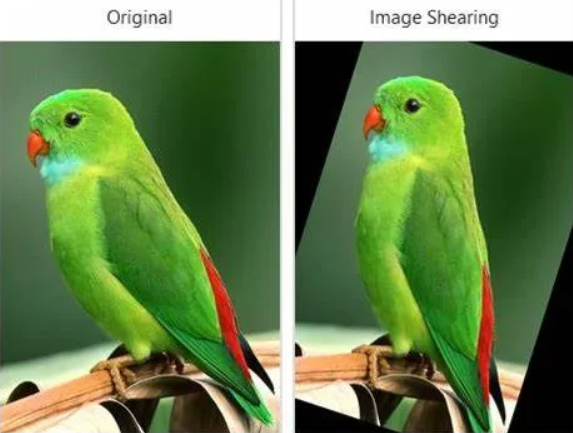

For the data augmentation, i choosed to :



- Randomly Zoom by 20% some training images

- Randomly flip images horizontally. Once our model is ready, we fit the training dataset.
- Vertical flip and Horizontal flip

In [16]:
datagen = ImageDataGenerator(
    rescale = 1./225 ,
    zoom_range = 0.2 ,
    shear_range = 0.2  ,
    vertical_flip = True ,
    horizontal_flip = True ,
    validation_split = 0.2
)

dir = "/content/plantvillage-dataset/plantvillage dataset/color"
# Train Generator
train_generator = datagen.flow_from_directory(
    dir ,
    target_size = (256 , 256) ,
    batch_size = 32 ,
    subset = "training",
    class_mode = "categorical"

)

# Vlidation Generator
validation_generator = datagen.flow_from_directory(
    dir ,
    target_size = (256 , 256) ,
    batch_size = 32 ,
    subset = "validation" ,
    class_mode = "categorical"
)

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


# **Model**

**Convolutional layers**

They are the fundamental building blocks of CNNs. These layers perform a critical mathematical operation known as convolution.

This process entails the application of specialized filters known as kernels, that traverse through the input image to learn complex visual patterns.

Kernels -

They are essentially small matrices of numbers. These filters move across the image performing element-wise multiplication with the part of the image they cover, extracting features such as edges, textures, and shapes.

This is a basic example with a 2 × 2 kernel:

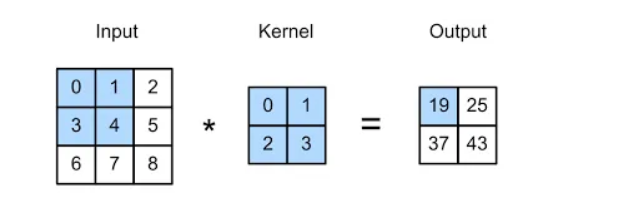

We start in the left corner of the input:

- (0 × 0) + (1 × 1) + (3 × 2) + (4 × 3) = 19

Then we slice one pixel to the right and perform the same operation:

- (1 × 0) + (2 × 1) + (4 × 2) + (5 × 3 ) = 25

After we completed the first row we move one pixel down and start again from the left:

- (3 × 0) + (4 × 1) + (6 × 2) + (7 × 3) = 37

Finally, we again slice one pixel to the right:

- (4 × 0) + (5 × 1) + (7 × 2) + (8 × 3) = 43

The output matrix of this process is known as the Feature map.

Now let's see the basic architecture of cnn model

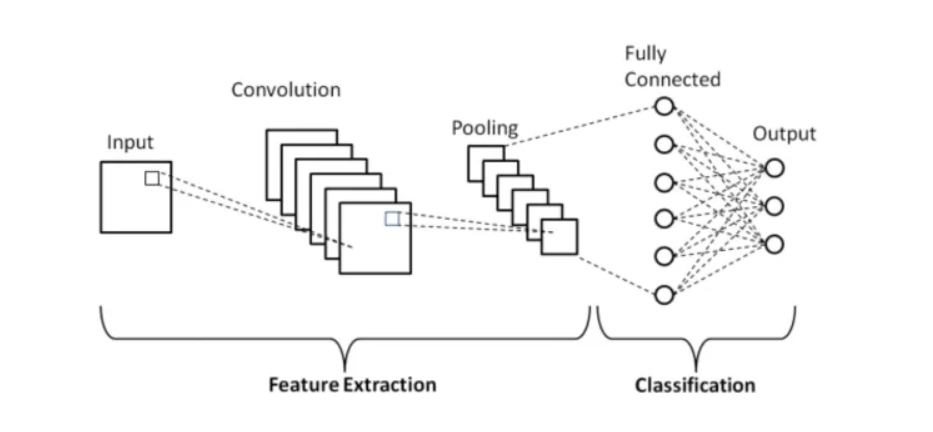

In [17]:
model = Sequential()
# Input size = 256 x 256
model.add(Conv2D(32 , (3,3) , activation = "relu" , input_shape = (256 , 256 , 3)))
# output size = 256 x 256
model.add(MaxPooling2D(2,2))
# output size = 128 x 128

# input size = 128 x 128
model.add(Conv2D(64 , (3,3) , activation = "relu"))
# output size = 128 x 128
model.add(MaxPooling2D(2,2))
# output size = 64 x 64



# The entire feature map and reorganizes it into a single, long vector.
model.add(Flatten())
model.add(Dense(38, activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This is how our model look like -

- Taking the image as an input with 256 x 256 x 3  size
- Applying convolutional layer with 32 neurons
- Once image will pass through convolutional layer then applying maxpooling with 2 x2 (image size - 128 x 128)
- Again passing our image ro second convolutional layer with 64 neurons
- Again using maxpooling layer (image size - 64 x 64)
- Now entire feature are converting  it into a single, long vector.

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38)             │     9,348,646 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,368,038 (35.74 MB)

 Trainable params: 9,368,038 (35.74 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])

In [23]:
history = model.fit(
    train_generator ,
    epochs = 10,
    # steps_per_epoch = train_generator.samples //32 ,
    steps_per_epoch = 120 ,
    validation_data = validation_generator ,
    # validation_steps = validation_generator.samples // 32
    validation_steps = 120
)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 117s 940ms/step - accuracy: 0.2000 - loss: 5.1520 - val_accuracy: 0.4677 - val_loss: 1.8445
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5033 - loss: 1.7376 - val_accuracy: 0.6190 - val_loss: 1.3129
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 113s 949ms/step - accuracy: 0.6346 - loss: 1.3011 - val_accuracy: 0.6862 - val_loss: 1.1142
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.6659 - loss: 1.1130 - val_accuracy: 0.6773 - val_loss: 1.0847
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 119s 996ms/step - accuracy: 0.6969 - loss: 1.0546 - val_accuracy: 0.7375 - val_loss: 0.8581
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.7092 - loss: 0.9321 - val_accuracy: 0.7172 - val_loss: 0.9580
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 113s 948ms/step - accuracy: 0.7438 - loss: 0.8509 - val_accuracy: 0.7578 - val_loss: 0.8211
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 112s 940ms/step - accuracy: 0.7373 - loss: 0.

**Getting around 80% accuracy in test data , can't say truely good as well as truely bad , But still with 80% accuracy in test data our model quite working well. But still we can increse accuracy by using more epochs.Maybe around 50 epochs or more than that**

In [24]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps= 120)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model...
120/120 ━━━━━━━━━━━━━━━━━━━━ 55s 455ms/step - accuracy: 0.7964 - loss: 0.6594
Validation Accuracy: 79.27%


**Now let's see the graph of Train accuracy and Test accuracy , through this we will get to know how our model is working on train and test data**

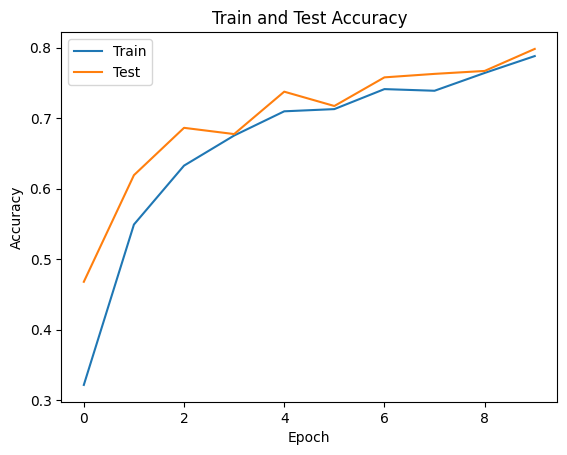

In [25]:
# Plot training and validation accuracy value
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Train and Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train" , "Test"], loc = "upper left")
plt.show()

With 10 epochs we are getting well accuracy on train and test accuracy , not facing overfiitig which is quiet good

**Now let see loss graph of train ans test**

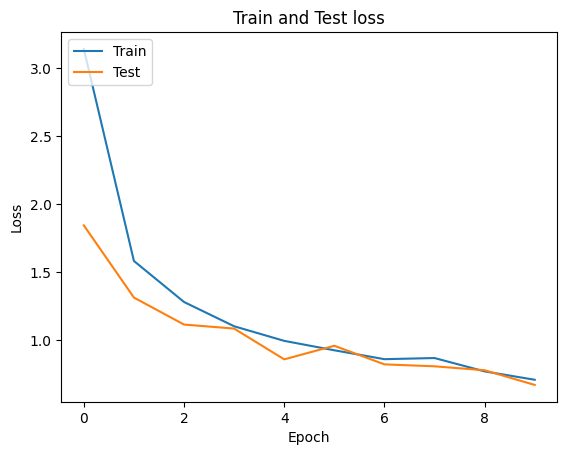

In [26]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train and Test loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

with epochs both train and test loss are decresing which is quiet good after 9 epochs our model is doing  less error on train as well test data

But still we can try with more epochs to understand how our model is working like - `[20 , 30 , 50 epochs ]`

# **Building a Predictive Model**

In [27]:
# Function to load and Process the image
def load_and_preprocess_image(image_path , target_size = (256 , 256)):
  img = Image.open(image_path)
  # Resize the image
  img = img.resize(target_size)
  # cpnvert the image to a numpy  array
  img_array = np.array(img)
  # Add batch dimension
  img_array = np.expand_dims(img_array , axis = 0)
  # Scale the image value to [0,1]
  img_array = img_array.astype("float32") / 255,
  return img_array

In [28]:
# Function to predict the class of image
def predict_image_class(model , image_path , class_indeces):
  preprocessed_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions , axis = 1)[0]
  predicted_class_name = class_indeces[predicted_class_index]

  return predicted_class_name

In [29]:
class_indices = {v :k for k , v in train_generator.class_indices.items()}
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

**Let's test the model**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class Name : Apple___Apple_scab


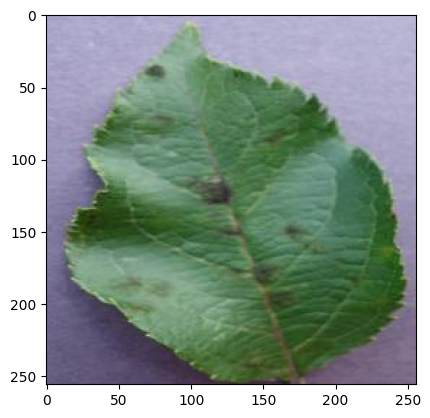

In [46]:
image_path = "/content/plantvillage-dataset/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"
img = plt.imread(image_path)
plt.imshow(img)

predicted_class_name = predict_image_class(model , image_path , class_indices)
print("Predicted class Name :" , predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Predicted class Name : Blueberry___healthy


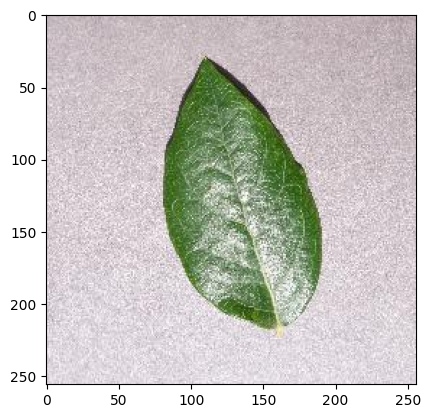

In [47]:
image_path = "/content/plantvillage-dataset/plantvillage dataset/color/Blueberry___healthy/008c85d0-a954-4127-bd26-861dc8a1e6ff___RS_HL 2431.JPG"
img = plt.imread(image_path)
plt.imshow(img)

predicted_class_name = predict_image_class(model , image_path , class_indices)
print("Predicted class Name :" , predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class Name : Peach___Bacterial_spot


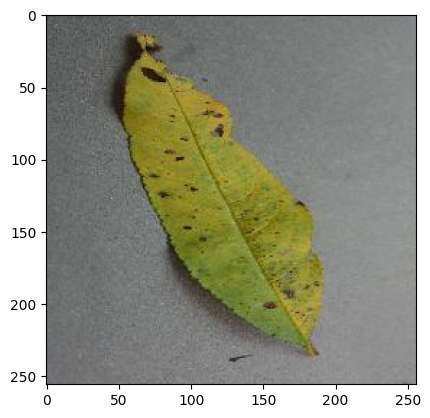

In [45]:
image_path = "/content/plantvillage-dataset/plantvillage dataset/color/Peach___Bacterial_spot/002eddd0-b6b3-474c-be08-423e53e24f82___Rutg._Bact.S 1955.JPG"
img = plt.imread(image_path)
plt.imshow(img)
predicted_class_name = predict_image_class(model , image_path , class_indices)
print("Predicted class Name :" , predicted_class_name)